# Machine Learning: Assignment 3: 

# Hardik Galiawala - B00777450

## 1. EM (Gaussian Mixture Model):

This Assignment requires you to write a Python program that loads the Iris dataset from the first assignment and apply EM with a Gaussian mixture model on the IRIS data. You are not allowed to use any Python library for the EM algorithm itsef, but you are of course allowed to use other helper functions. You might compare the results of your program with sklearn models, but the whole exercise is to write the algorithm yourself.

1.1 Write a program to implement EM with a Gaussian mixture model on the Iris dataset for k=3 and plot the Sepal data points with a color coding based on the obtained clusters.  More specifically, you can plot the data points with color where the RGB colour values correspond to the probability estimates of a data point belonging to each class.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import math
import scipy.stats as st

from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

In [3]:
iris_data = load_iris()

target = iris_data.target 
#iris_data = np.delete(iris_data, 4,1) 
iris_sepal = iris_data.data[:,:2]

In [4]:
def em_gmm(iris_sepal, iteration, k):
    tot_data_points = len(iris_sepal[:, 0])
    
    # Creating arbitrary parameters
    mean = iris_sepal[np.random.choice(tot_data_points, k, False), :]
    # Creating diagonal matrix number of class "k" * (2 X 2)
    sigma = [np.eye(2)] * k
    phi = [1./k] * k
    
    
    # Creating a float array of the order tot_data_points X k 
    cluster_prob_norm = np.array([[0.0]*k for i in range(tot_data_points)])
    
    
    # Calculate probability of features (x1 and x2) given randomly assigned parameters (phi, mean, sigma)
    P = lambda mean, s: np.linalg.det(s) **-.5 ** (2 * np.pi) ** (-iris_sepal.shape[1]/2.) \
            * np.exp(-.5 * np.einsum('ij, ij -> i', iris_sepal - mean, np.dot(np.linalg.inv(s), (iris_sepal - mean).T).T))
    for i in range(iteration):
        
        # Expectation part
        for l in range(k):
            cluster_prob_norm[:, l] = phi[l] * P(mean[l], sigma[l])
          
        # Normalize class probabilities
        cluster_prob_norm = (cluster_prob_norm.T / np.sum(cluster_prob_norm, axis = 1)).T
        
        # Maximization 
        # 1. Update phi
        weights = np.array(np.sum(cluster_prob_norm, axis = 0))
        phi = (1./ tot_data_points) * weights
        
        # 2 Update mean and sigma
        for l in range(k):
            mean[l, :] = (np.dot(cluster_prob_norm[:, l], iris_sepal)) / weights[l] 
            iris_sepal_mean = np.matrix(iris_sepal - mean[l, :])
            sigma[l] = np.array(1 / weights[l] * np.dot(np.multiply(iris_sepal_mean.T, cluster_prob_norm[:, l]), 
                                                         iris_sepal_mean))
        
        
        class_label = cluster_prob_norm.argmax(axis = 1)
    return(cluster_prob_norm, class_label)

(150, 3)


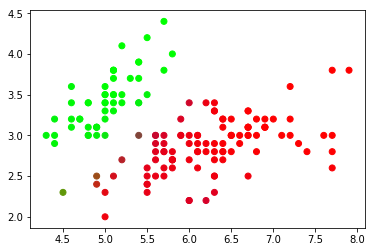

In [5]:
cluster_prob_norm, class_label = em_gmm(iris_sepal, 10, 3)
print(cluster_prob_norm.shape)
scatter(iris_sepal[:, 0], iris_sepal[:, 1], facecolors=cluster_prob_norm)
plt.show()

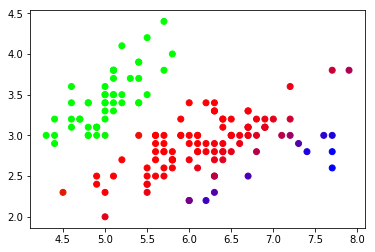

In [18]:
cluster_prob_norm, class_label = em_gmm(iris_sepal, 30, 3)
scatter(iris_sepal[:, 0], iris_sepal[:, 1], facecolors=cluster_prob_norm)
plt.show()

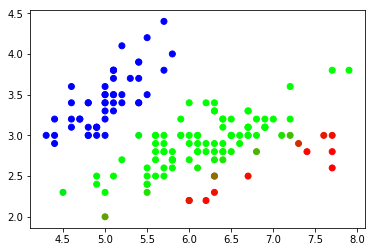

In [17]:
cluster_prob_norm, class_label = em_gmm(iris_sepal, 70, 3)
scatter(iris_sepal[:, 0], iris_sepal[:, 1], facecolors=cluster_prob_norm)
plt.show()

**1.2. Graduate students only [15 marks] ** Evaluate the prediction quality with different number of assumed classes (k=2,3,4). Explain briefly your evaluation method and discuss your finding.

Reference of function plot_classification_report()

https://stackoverflow.com/questions/28200786/how-to-plot-scikit-learn-classification-report#44188254

In [32]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        #print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

** For k = 2 **

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.50      1.00      0.66        50
          2       0.00      0.00      0.00        50

avg / total       0.50      0.66      0.55       150



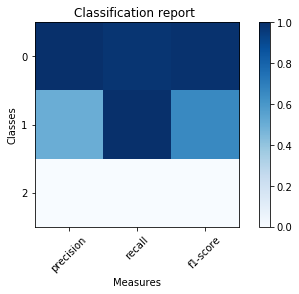

In [33]:
cluster_prob_norm, class_label = em_gmm(iris_sepal, 60, 2)
classificationReport = classification_report(target, class_label, target_names = ['0', '1', '2'])
print(classificationReport)
plot_classification_report(classificationReport)
plt.show()

** For k = 3 **

             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.43      0.60      0.50        50
          2       0.32      0.20      0.25        50

avg / total       0.58      0.59      0.58       150



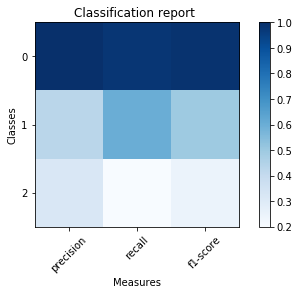

In [34]:
cluster_prob_norm, class_label = em_gmm(iris_sepal, 60, 3)
classificationReport = classification_report(target, class_label, target_names = ['0', '1', '2'])
print(classificationReport)
plot_classification_report(classificationReport)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.98      0.99        50
          1       0.42      0.16      0.23        50
          2       0.68      0.50      0.57        50
          3       0.00      0.00      0.00         0

avg / total       0.70      0.55      0.60       150



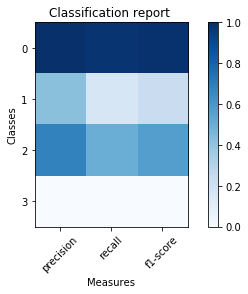

In [36]:
cluster_prob_norm, class_label = em_gmm(iris_sepal, 60, 4)
classificationReport = classification_report(target, class_label, target_names = ['0', '1', '2', '3'])
print(classificationReport)
plot_classification_report(classificationReport)
plt.show()

As we can observe the graphs based on the classification report for various classes (2, 3 and 4), it is quite clear that the algorithm works best for k = 3. If we observe the column "Support" in our classification report then we understand the reason for the same. It gives us an idea about data present under each class. It is very important to understand the same when dealing with classification as it helps us understand the value of k. We also have precision, recall and f1-score metrics. Recall would help us identify the "True Positive Rates" which are important in this scenario.

2.	[20 marks, 10 marks for Grads] This Assignment requires you to write a Python script to calculate some inference of a simplified version of the car repair example from the manuscript. Given are the following probabilities: 
The marginal probability that the alternator is broken is 1/1000 and the marginal probability that the fan belt is broken is 2/100. The probability that the battery is charging when either the alternator or the fan belt is broken is zero. However, even if both are working there is a 5/1000 probability that the battery is not charging. When the battery is not charging then there is a 90% chance that the battery is flat, though even if the battery is charging then there is a 10% chance that the battery is flat. Finally, the car does not start if either the battery is flat, or there is no gas, or the starter is broken. However. Even if these three conditions don’t hold there is a 5% chance that the car won’t start. 
2.1.	Draw the causal model of this system.
2.2.	What is the probability that the alternator is broken given that the car won’t start?
2.3.	What is the probability that the fan belt is broken given that the car won’t start?
2.4.	What is the probability that the fan belt is broken given that the car won’t start and the alternator is broken?
2.5.	What is the probability that the alternator and the fan belt is broken given that the car won’t start?


In [37]:
# Importing required library
from lea import *

# Definining marginal probabilities for the nodes given in the causal model diagram.
alternator_broken_a1 = Lea.boolProb(1,1000)
fanbelt_broken_a2 = Lea.boolProb(2,100)
starter_broken_a5 = Lea.boolProb(0,100)
no_gas_a6 = Lea.boolProb(0,100)

# Creating conditional probability table (CPT) based on the Directed Acyclic Graphs (DAGs)
# This part helps to reduce the number of nodes and play a vital part in the causal models

battery_not_charging_a3 = Lea.buildCPT((alternator_broken_a1 | fanbelt_broken_a2 , Lea.boolProb(1,1)),
                                       (~alternator_broken_a1 & ~fanbelt_broken_a2 , Lea.boolProb(5,1000)))
                                    
battery_flat_a4 = Lea.buildCPT((battery_not_charging_a3 , Lea.boolProb(9,10)),
                               (~battery_not_charging_a3 , Lea.boolProb(1,10)))

car_wont_start_a7 = Lea.buildCPT((battery_flat_a4 | no_gas_a6 | starter_broken_a5 , Lea.boolProb(1,1)),
                                 (~battery_flat_a4 & ~no_gas_a6 & ~starter_broken_a5 , Lea.boolProb(5,100)))

print("2.2: The probability of the alternator being broken given that the car wont start is: ")
print(alternator_broken_a1.given(car_wont_start_a7))
print("2.3: The probability that the fan belt is broken given that the car wont start is: ")
print(fanbelt_broken_a2.given(car_wont_start_a7))
print("2.4: The probability that the fan belt is broken given that the car wont start and the alternator is broken: ")
print(fanbelt_broken_a2.given(car_wont_start_a7 & alternator_broken_a1))
print("2.5: The probability that the alternator and the fan belt is broken given that the car wont start is: ")
print((alternator_broken_a1 & fanbelt_broken_a2).given(car_wont_start_a7))  

2.2: The probability of the alternator being broken given that the car wont start is: 
False : 40940019/41166269
 True :   226250/41166269
2.3: The probability that the fan belt is broken given that the car wont start is: 
False : 36641269/41166269
 True :  4525000/41166269
2.4: The probability that the fan belt is broken given that the car wont start and the alternator is broken: 
False : 49/50
 True :  1/50
2.5: The probability that the alternator and the fan belt is broken given that the car wont start is: 
False : 41161744/41166269
 True :     4525/41166269


## 3. Naive Bayes:

This Assignment requires you to write a Python program to test a simple binominal version of the Naïve Bayes algorithm on the 20newsgroups dataset. You need to read the data and work with sparse data in python. You should write a Naïve Bayes program on your own (not using library function) to implement the binomial version of the Naïve Bayes rule outlined in the manuscript. Please provide the results in form of a confusion matrix.

### Reference : 

https://github.com/keith-mcqueen/20-newsgroups

In [12]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
import pylab as pl
import pandas as pd

0.341973490427


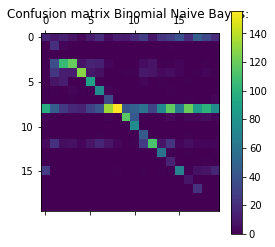

In [18]:
def nb():
    categories = fetch_20newsgroups(subset='train').target_names
    newsgroups_train = fetch_20newsgroups(subset="train", remove=('headers', 'footers', 'quotes'),
                                      categories=categories)

    train_data = pd.DataFrame({"x": newsgroups_train.data,
                           "y": newsgroups_train.target})


    # constructing feature vector
    vectorizer = CountVectorizer(stop_words="english", binary=True)
    X = vectorizer.fit_transform(train_data["x"])

    x = X.toarray()

    # splitting into train and test
    x_train = np.split(x, [int(len(x)*0.7), len(x)])[0]
    x_test = np.split(x, [int(len(x)*0.7), len(x)])[1]

    y = np.array(train_data["y"])
    y_train = np.split(y,[int(len(y)*0.7), len(y)])[0]
    y_test = np.split(y,[int(len(y)*0.7), len(y)])[1]


    # calculating prob_priors and likelihoods for each word per document class
    prob_priors = np.array([])
    probab_words = np.array([])
    for i in np.unique(train_data["y"]):
    
        prob_priors = np.append(prob_priors, len(y_train[y_train == i])/len(y_train))
        if i == 0:
            probab_words = np.append(probab_words,
                                     (np.sum(x_train[y_train == i], axis=0)+1)/(len(y_train[y_train == i])+2))
        elif i == 1:
            probab_words = np.append([probab_words],
                                     [(np.sum(x_train[y_train == i], axis=0)+1)/(len(y_train[y_train == i])+2)],
                                     axis=0)
        else:
            probab_words = np.append(probab_words,
                                     [(np.sum(x_train[y_train == i], axis=0)+1)/(len(y_train[y_train == i])+2)],
                                     axis=0)


    # predict
    predicted_target_class = np.array([])
    for j in range(len(x_test)):
        proab_predict = np.array([])
        for i in np.unique(train_data["y"]):
            probab_posteriors = ((probab_words[i] * x_test[j]) + ((1 - probab_words[i]) * (1 - x_test[j])))
            probab_posteriors = np.prod(probab_posteriors) * prob_priors[i]
            proab_predict = np.append(proab_predict, probab_posteriors)

        predicted_target_class = np.append(predicted_target_class, np.argmax(proab_predict))
    
    print(accuracy_score(predicted_target_class, y_test))
    
    cm = confusion_matrix(predicted_target_class, y_test)
    #print(cm)
    pl.matshow(cm)
    pl.title("Confusion matrix Binomial Naive Bayes: ")
    pl.colorbar()
    pl.show()
nb()